In [1]:
import re
import random
import pandas as pd
import seaborn as sns
import os
import matplotlib.pyplot as plt
plt.show()
%matplotlib inline 

In [2]:
def randomBinaryGenerator(length):
    bitString = ""
    while len(bitString) < length:
        hex_string = os.urandom(1)
        binary_string = bin(ord(hex_string))
        binary = binary_string[2:]
        bitString += binary
    return [bitString]

def getBinaryList(string):
    bits = []
    for i in range(len(string)):
        #get the bits of each character
        bitsSeq = format(ord(string[i]), 'b')
        #getting the four bit address
        address = '{0:04b}'.format(i)
        #8 bit ascii data
        bits_padding = '{0:08b}'.format(int(bitsSeq,2))
        #appending address/data to bitList
        bits.append(address + bits_padding)
    return bits

def getBinary(string):
    bits = ""
    for i in range(len(string)):
        #get the bits of each character
        bitsSeq = format(ord(string[i]), 'b')
        bits_padding = '{0:08b}'.format(int(bitsSeq,2))
        #appending address/data to bitList
        bits = bits + bits_padding
    return bits

def getBitList(string):
    bitList = []
    #first split so that each string of bits represents up to three chars
    stringList = re.findall('....?', string)
    for i in range(len(stringList)):
        address = '{0:04b}'.format(i)
        bits = '{0:032}'.format(int(getBinary(stringList[i])))
        allData = address+bits
        bitList.append(str(allData))
    return bitList

def getBinaryfromFile(file):
    with open(file, 'r') as file:
        data = file.read().replace('\n', '')
    return getBinaryList(data)

def getBinaryfromFile2(file):
    with open(file, 'r') as file:
        data = file.read().replace('\n', '')
    return getBitList(data)


In [3]:
#bitstoTrits: bitString --> (8-trit) tritString (left-padded with zeros)
def bitstoTrits(bitString):
    trinary = ""
    #first convert bitString to base 10 integer
    baseTen = int(bitString, 2)
    #simple way to convert base 10 integer to base 3 integer
    if baseTen <= 0:
        trinary = "0"
    while (baseTen > 0):
        trinary = str((baseTen)%3) + trinary
        baseTen = baseTen//3
    #return 8-trit trit string left-padded with zeroes
    return '{0:08}'.format(int(trinary))

#bitstoNonits: bitString --> (8-trit) Nonits (left-padded with zeros)
def bitstoNonits(bitString):
    nonary = ""
    #first convert bitString to base 10 integer
    baseTen = int(bitString, 2)
    if baseTen <= 0:
        nonary = "0"
    #simple way to convert base 10 integer to base 3 integer
    while (baseTen > 0):
        nonary = str((baseTen)%9) + nonary
        baseTen = baseTen//9
    #return 8-trit trit string left-padded with zeroes
    return '{0:012}'.format(int(nonary))

def bitstoSexits(bitString):
    sexary = ""
    #first convert bitString to base 10 integer
    baseTen = int(bitString, 2)
    if baseTen <= 0:
        sexary = "0"
    #simple way to convert base 10 integer to base 3 integer
    while (baseTen > 0):
        sexary = str((baseTen)%6) + sexary
        baseTen = baseTen//6
    #return 8-trit trit string left-padded with zeroes
    return '{0:012}'.format(int(sexary))

#getTrits: bitList --> tritList
#usage: getTrits(getBinary(string)) will give you a list w each element
#representing an ASCII char in trits
def getTrits(binList):
    return (list(map(bitstoTrits, binList)))

def getSexits(binList):
    return (list(map(bitstoSexits, binList)))

def getNonits(binList):
    return (list(map(bitstoNonits, binList)))


In [4]:
#Step 2: Get DNA Sequence from Nonits
#codon-inspired modulation 
def codonModulation(trits): 
    codonDict = {
    "00": ["GAC", "GAG", "ATT", "ATG"],
    "01": ["GCT", "GCG", "GCA", "CTC"],
    "02": ["GAT", "GTA", "GTG", "CTG"],
    "10": ["CTA", "CAT", "CAC", "GTC"],
    "11": ["CAG", "CGC", "CGT", "TAT"],
    "12": ["TGA", "TGT", "TGC", "CGA"],
    "20": ["TAC", "TAG", "TCG", "AGA"],
    "21": ["ACT", "AGT", "AGC", "TCA"],
    "22": ["ACG", "ACT", "ACA", "TCT"]
    }
    seq = ""
    for i in range(0, len(trits)-1, 2): 
        rand = random.randint(0, 3)
        codonList = codonDict[str(trits[i]) + str(trits[i+1])]
        codon = codonList[rand]
        if seq: 
            if seq[-1] is codon[0]: 
                codon = codonList[-1]
        seq += codon
    return seq

def str2DNA_codon(binFun, input):
    seqList = (list(map(codonModulation, getTrits(binFun(input)))))
    return seqList


#from modulation 1 (not tweaked)
def newModulation(trits):
    newModDict = {
    "00": "AT",
    "01": "AG",
    "02": "AC",
    "10": "TA",
    "11": "TG",
    "12": "TC",
    "20": "GA",
    "21": "GT",
    "22": "GC"
    }
    seq = ""

    for i in range(0, len(trits)-1, 2):
        seq += newModDict[(trits[i]+trits[i+1])]
    return seq

def str2DNA2(binFun, input):
    seqList = (list(map(newModulation, getTrits(binFun(input)))))
    return seqList
#nonit modulation 
def getNextNuc2(nonit, seq):
    seqDict = {
    "G": {0: "AT", 1: "AC", 2: "AG", 3: "CT", 4: "CA", 5: "CG", 6: "TA", 7:"TC", 8:"TG"},
    "A": {0: "TA", 1: "CT", 2: "CG", 3: "TC", 4: "CA", 5: "TG", 6: "GA", 7:"GC", 8:"GT"},
    "C": {0: "AT", 1: "AC", 2: "AG", 3: "TA", 4: "TC", 5: "TG", 6: "GA", 7:"GC", 8:"GT"},
    "T": {0: "AT", 1: "CT", 2: "CG", 3: "GA", 4: "GC", 5: "GT", 6: "CA", 7:"AC", 8:"AG"}
    }
    return seqDict[seq[-1]][nonit]

#sexit modulation 
def getNextNuc3(sexit, seq):
    seqDict = {
    "G": {0: "AT", 1: "AC", 2: "CT", 3: "TA", 4:"TC", 5:"TG"},
    "A": {0: "TA", 1: "CT", 2: "TC",  3: "TG", 4: "GA",  5:"GT"},
    "C": {0: "AT", 1: "AC", 2: "AG", 3: "TA", 4: "TC", 5: "GA",},
    "T": {0: "AT", 1: "CT",  2: "GA",  3: "GT", 4:"AC", 5:"AG"}}
    return seqDict[seq[-1]][sexit]

def nonits2DNA(nonits):
    seq = []
    for nonit in nonits:
        #start with G
        seq.append(getNextNuc2(int(nonit), "G")) if (not seq) else seq.append(getNextNuc2(int(nonit), seq[-1]))
    return "".join(seq)

def sexits2DNA(sexits):
    seq = []
    for sexit in sexits:
        #start with G
        seq.append(getNextNuc3(int(sexit), "G")) if (not seq) else seq.append(getNextNuc3(int(sexit), seq[-1]))
    return "".join(seq)

def str2DNA(binFun, input):
    seqList = (list(map(trits2DNA, getTrits(binFun(input)))))
    return seqList

def str2DNA_nonits(binFun, input):
    seqList = (list(map(nonits2DNA, getNonits(binFun(input)))))
    return seqList
def str2DNA_sexits(binFun, input):
    seqList = (list(map(nonits2DNA, getSexits(binFun(input)))))
    return seqList
#modulation from paper

#getNextNuc: helper function, gets the next nucleotide in the sequence
def getNextNuc(trit, seq):
    #create a dictionary with each key being the previous
    #nucleotide and the values being the next nucleotide
    seqDict = {
    "G": {0: "A", 1: "T", 2: "C"},
    "A": {0: "G", 1: "C", 2: "T"},
    "C": {0: "T", 1: "G", 2: "A"},
    "T": {0: "C", 1: "A", 2: "G"}
    }
    return seqDict[seq[-1]][trit]

#takes in a sequence of trits as a string and returns the correct DNA sequence
def trits2DNA(trits):
    seq = []
    for trit in trits:
        #start with G
        seq.append(getNextNuc(int(trit), "G")) if (not seq) else seq.append(getNextNuc(int(trit), seq[-1]))
    return "".join(seq)

#combine all functions into one master function
#str2DNA: string --> (string representation) DNA Sequence
def str2DNA1(binFun, input):
    seqList = (list(map(trits2DNA, getTrits(binFun(input)))))
    return seqList

#dnaHelloWorld = str2DNA('hello world')
#print("\n".join(dnaHelloWorld))
# AGACTGTG
# AGTACTGA
# AGCGTGCA
# ACTATACT
# ACGCTCTA
# ACACTATA
# ATCACTGC
# ATATACGT
# ATGCAGAT
# TCTGCGAG
# TCGCACGC

#Q: why is there a discrepancy between the match the H0-H12 distributions
def getExtensionLengths(seq):
    #similar dict (key = prev nucleotide, value = dict of all possible nucleotides with *median* extension length)
    #from Fig 2c
    extLenDict = {
    "G": {"A": 4, "C": 2 , "T": 2, },
    "A": {"G": 5 , "C": 3, "T": 3 },
    "C": {"T": 4, "G": 6 , "A": 11},
    "T": {"C": 2, "A": 3 , "G": 4}
    }
    extSeq = ""
    count = 0
    for s in seq:
        if (not extSeq):
            extSeq += s * extLenDict["G"][str(s)]
            count += extLenDict["G"][str(s)]
        else:
             nextExt = extLenDict[extSeq[-1]][s]
             extSeq += s * nextExt
             count += nextExt
    return (extSeq, count)

def getExtensionLengths2(seq):
    #similar dict (key = prev nucleotide, value = dict of all possible nucleotides with *median* extension length)
    #from Fig 2c
    #I know it wouldn't work, but I included same-base transitions and made them 3 (I guess it could work if you could TELL that it was an extension of two bases)
    extLenDict = {
    "G": {"A": 4, "C": 2 , "T": 2, "G": 3},
    "A": {"G": 5 , "C": 3, "T": 3, "A": 3},
    "C": {"T": 4, "G": 6 , "A": 11, "C": 3},
    "T": {"C": 2, "A": 3 , "G": 4, "T": 3}
    }
    extSeq = ""
    count = 0
    for s in seq:
        if (not extSeq):
            extSeq += s
            count += 1
        else:
             nextExt = extLenDict[extSeq[-1]][s]
             extSeq += s * nextExt
             count += nextExt
    return (extSeq, count)

#getInfoIndex: gets the bits/nt rate for an ASCII string
#modFun = function used for ascii --> DNA sequence

#ASCII string --> float rate
def getInfoIndex(mod, data, extLenFun, bitList, seqList):
    extendedDNA = list((map(extLenFun, seqList)))
    #get total # nucleotides
    nucTotal = sum(length for seq,length in extendedDNA)
    #get GC content
    gcCount = 0
    for dnaSeq in extendedDNA:
        for nuc in dnaSeq[0]:
            if nuc is "G" or nuc is "C":
                gcCount += 1

    #get total # bits
    bitsTotal = sum(len(bits) for bits in bitList)
    return (mod, data, bitsTotal/nucTotal, bitsTotal, nucTotal, gcCount/nucTotal)



In [5]:
data = []
#original modulation
data.append(getInfoIndex('orig', 'hello world', getExtensionLengths, getBinaryList('hello world'), str2DNA(getBinaryList, 'hello world')))
data.append(getInfoIndex('orig', 'indpendence.txt', getExtensionLengths, getBinaryfromFile('indpendence.txt'), str2DNA(getBinaryfromFile, 'indpendence.txt')))
data.append(getInfoIndex('orig', 'random 10k', getExtensionLengths, randomBinaryGenerator(10000), list(map(trits2DNA, getTrits(randomBinaryGenerator(10000))))))

#nonit modulation
data.append(getInfoIndex('nonit', 'hello world', getExtensionLengths, getBitList('hello world'), str2DNA_nonits(getBitList, 'hello world')))
data.append(getInfoIndex('nonit', 'indpendence.txt', getExtensionLengths, getBinaryfromFile2('indpendence.txt'), str2DNA_nonits(getBinaryfromFile2, 'indpendence.txt')))
data.append(getInfoIndex('nonit', 'random 10k', getExtensionLengths, randomBinaryGenerator(10000), list(map(nonits2DNA, getNonits(randomBinaryGenerator(10000))))))

#c-->x minimizing modulation
data.append(getInfoIndex('c->x minimizing', 'hello world', getExtensionLengths2, getBinaryList('hello world'), str2DNA2(getBinaryList, 'hello world')))
data.append(getInfoIndex('c->x minimizing', 'indpendence.txt', getExtensionLengths2, getBinaryfromFile('indpendence.txt'), str2DNA2(getBinaryfromFile, 'indpendence.txt')))
data.append(getInfoIndex('c->x minimizing', 'random 10k', getExtensionLengths2, randomBinaryGenerator(10000), list(map(trits2DNA, getTrits(randomBinaryGenerator(10000))))))

#sexit modulation
data.append(getInfoIndex('sexit', 'random 10k', getExtensionLengths, randomBinaryGenerator(10000), list(map(sexits2DNA, getSexits(randomBinaryGenerator(10000))))))
data.append(getInfoIndex('sexit', 'indpendence.txt', getExtensionLengths, getBinaryfromFile2('indpendence.txt'), str2DNA_sexits(getBinaryfromFile2, 'indpendence.txt')))
data.append(getInfoIndex('sexit', 'hello world', getExtensionLengths, getBitList('hello world'), str2DNA_sexits(getBitList, 'hello world')))

#codon modulation 
data.append(getInfoIndex('codon', 'hello world', getExtensionLengths2, getBinaryList('hello world'), str2DNA_codon(getBinaryList, 'hello world')))
data.append(getInfoIndex('codon', 'indpendence.txt', getExtensionLengths2, getBinaryfromFile('indpendence.txt'), str2DNA_codon(getBinaryfromFile, 'indpendence.txt')))
data.append(getInfoIndex('codon', 'random 10k', getExtensionLengths2, randomBinaryGenerator(10000), list(map(codonModulation, getTrits(randomBinaryGenerator(10000))))))

df = pd.DataFrame(data, columns = ['mod', 'data', 'bits/nt', 'total bits', 'total dNTPS', 'GC Content'])



Text(0.5, 1.0, 'Total Nucleotides for each mod in random 10k bits')

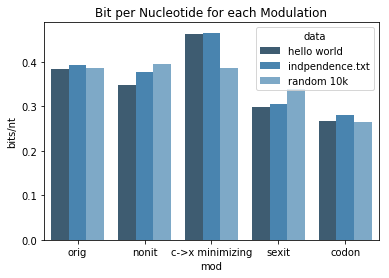

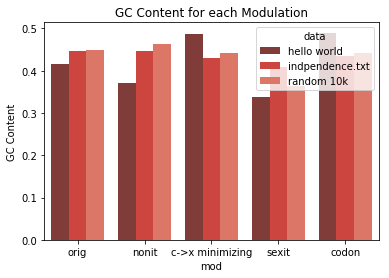

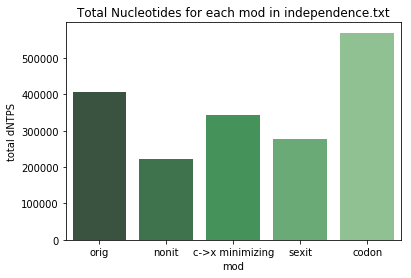

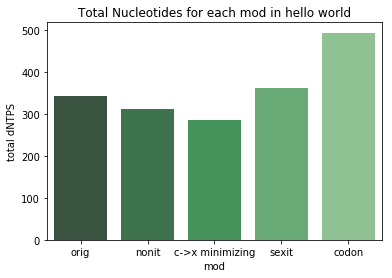

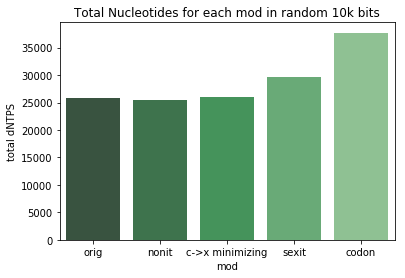

In [6]:
#creating figures 
plt.figure()
ax1 = sns.barplot(x="mod", hue="data", y = "bits/nt", data = df, palette="Blues_d")
ax1.set_title('Bit per Nucleotide for each Modulation')

plt.figure()
ax2 = sns.barplot(x="mod", hue="data", y = "GC Content", data = df, palette="Reds_d")
ax2.set_title('GC Content for each Modulation')

plt.figure()
ax3 = sns.barplot(x="mod", y = "total dNTPS", data = df[df.data == "indpendence.txt"], palette="Greens_d")
ax3.set_title('Total Nucleotides for each mod in independence.txt')

plt.figure()
ax4 = sns.barplot(x="mod", y = "total dNTPS", data = df[df.data == "hello world"], palette="Greens_d")
ax4.set_title('Total Nucleotides for each mod in hello world')

plt.figure()
ax5 = sns.barplot(x="mod", y = "total dNTPS", data = df[df.data == "random 10k"], palette="Greens_d")
ax5.set_title('Total Nucleotides for each mod in random 10k bits')

In [8]:
#This is to see how GC Content, bits/nt, and total dNTPS changes as the amount of data grows larger 
def randomNucleotides():
    data = []
    for i in range(10000, 100000, 10000):
        data.append(getInfoIndex('orig', 'random ' + str(i) + ' bits', getExtensionLengths, randomBinaryGenerator(i), list(map(trits2DNA, getTrits(randomBinaryGenerator(i))))))
        data.append(getInfoIndex('nonit', 'random ' + str(i) + ' bits', getExtensionLengths, randomBinaryGenerator(i), list(map(nonits2DNA, getNonits(randomBinaryGenerator(i))))))
        data.append(getInfoIndex('c->x minimizing', 'random ' + str(i) + ' bits', getExtensionLengths2, randomBinaryGenerator(i), list(map(trits2DNA, getTrits(randomBinaryGenerator(i))))))
        data.append(getInfoIndex('codon', 'random ' + str(i) + ' bits', getExtensionLengths2, randomBinaryGenerator(i), list(map(codonModulation, getTrits(randomBinaryGenerator(i))))))
        data.append(getInfoIndex('sexit', 'random ' + str(i) + ' bits', getExtensionLengths, randomBinaryGenerator(i), list(map(sexits2DNA, getSexits(randomBinaryGenerator(i))))))
    df = pd.DataFrame(data, columns = ['mod', 'data', 'bits/nt', 'total bits', 'total dNTPS', 'GC Content'])
    return df

nucDF = randomNucleotides()

Text(0.5, 1.0, 'Total Nucleotides for each Modulation')

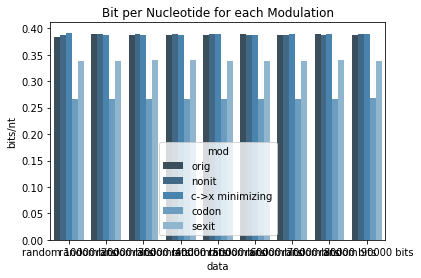

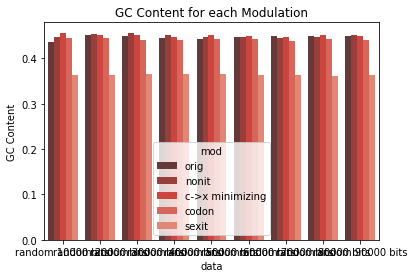

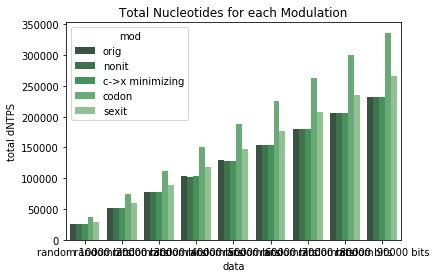

In [9]:

plt.figure()
ax = sns.barplot(x="data", hue="mod", y = "bits/nt", data = nucDF, palette="Blues_d")
ax.set_title('Bit per Nucleotide for each Modulation')

plt.figure()
ax = sns.barplot(x="data", hue="mod", y = "GC Content", data = nucDF, palette="Reds_d")
ax.set_title('GC Content for each Modulation')

plt.figure()
ax = sns.barplot(x="data", hue="mod", y = "total dNTPS", data = nucDF, palette="Greens_d")
ax.set_title('Total Nucleotides for each Modulation')

In [10]:
#Exploring the latent structure more
def getNucTransitionDistributions(seqList):
    transitions = ["AC", "AT", "AG", "CA", "CG", "CT", "GA", "GC", "GT", "TA", "TC", "TG" ]
    counts = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

    df = pd.DataFrame(list(zip(transitions, counts)), columns = ["transition", "count"])
    for seqString in seqList:
        for i in range(len(seqString)-1):
            df.at[transitions.index(seqString[i]+seqString[i+1]), 'count'] += 1
    df = df.sort_values('count')
    return df

def getbaseNumDistribution(intList):
    intCount = {}
    for list in intList:
        for i in list:
            if i not in intCount:
                intCount[i] = [1]
            else:
                intCount[i][0] += 1
    df = pd.DataFrame.from_dict(intCount, orient="index", columns = ["count"])
    df.reset_index(level=0, inplace=True)
    return df


Text(0.5, 1.0, 'nonit distribution for random 1m')

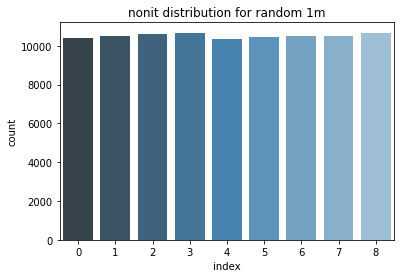

In [11]:
#Question: why is the nonit modulation performing better than original for independence.txt but not random binary generator?
#identifying any trends in random binary generator
rbmil = randomBinaryGenerator(300000)
#looking at the distribution of nonits
df3 = getbaseNumDistribution(getNonits(rbmil))

#there is a bias towards 0 and 1s in the nonit
plt.show()
ax = sns.barplot(x ="index", y = "count", data = df3, palette="Blues_d")
ax.set_title("nonit distribution for random 1m")

Text(0.5, 1.0, 'transition distribution for nonit mod 1m')

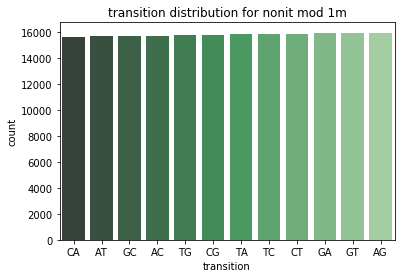

In [12]:
#nonit modulation: looking at distribution of transitions
seqList_nonit = list(map(nonits2DNA, getNonits(rbmil)))
df_trans_nonit = getNucTransitionDistributions(seqList_nonit)
plt.show()
ax = sns.barplot(x="transition", y = "count", data = df_trans_nonit, palette="Greens_d")
ax.set_title("transition distribution for nonit mod 1m")

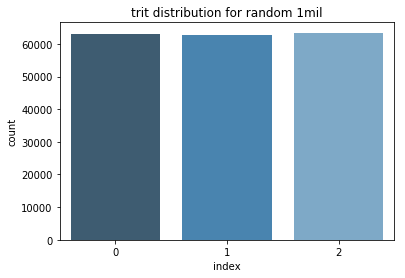

Text(0.5, 1.0, 'transition distribution for trit mod - 1m')

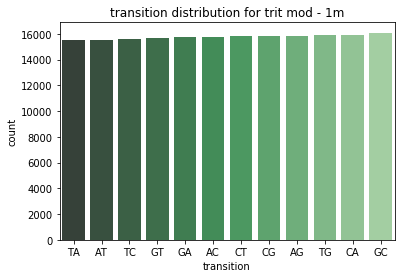

In [13]:
#for original
#looking at the distribution of trits
df3 = getbaseNumDistribution(getTrits(rbmil))
plt.show()
ax = sns.barplot(x ="index", y = "count", data = df3, palette="Blues_d")
ax.set_title("trit distribution for random 1mil")
#trit modulation: looking at distribution of transitions
seqList_trits = list(map(trits2DNA, getTrits(rbmil)))
df_trans_trits = getNucTransitionDistributions(seqList_trits)
plt.show()
ax = sns.barplot(x="transition", y = "count", data = df_trans_trits, palette="Greens_d")
ax.set_title("transition distribution for trit mod - 1m")

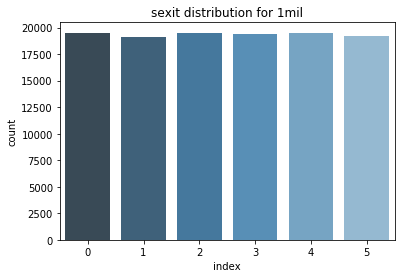

Text(0.5, 1.0, 'transition distribution for sexit mod - 1m')

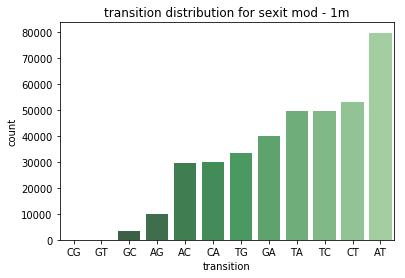

In [14]:
#sexit modulation
seqList_sexits = list(map(sexits2DNA, getTrits(rbmil)))
df_trans_sexits = getNucTransitionDistributions(seqList_sexits)
df_sexits = getbaseNumDistribution(getSexits(rbmil))
plt.show()
ax = sns.barplot(x ="index", y = "count", data = df_sexits, palette="Blues_d")
ax.set_title("sexit distribution for 1mil")
plt.show()
ax = sns.barplot(x="transition", y = "count", data = df_trans_sexits, palette="Greens_d")
ax.set_title("transition distribution for sexit mod - 1m")

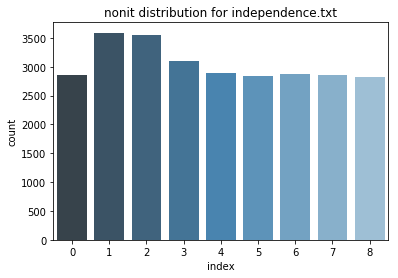

Text(0.5, 1.0, 'transition distribution for nonit mod - independence.txt')

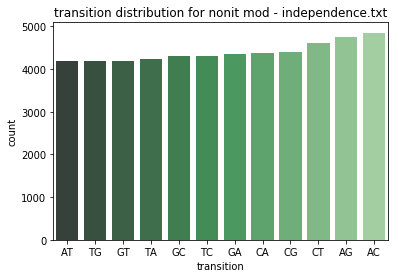

In [15]:
#looking at indepenence.txt
independence = getBinaryfromFile2('indpendence.txt')
df_nonit_ind =  getbaseNumDistribution(getNonits(independence))

plt.show()
ax = sns.barplot(x ="index", y = "count", data = df_nonit_ind, palette="Blues_d")
ax.set_title("nonit distribution for independence.txt")


seqList_nonit_indep = list(map(nonits2DNA, getNonits(independence)))
df_trans_nonit_indep = getNucTransitionDistributions(seqList_nonit_indep)

plt.show()
ax = sns.barplot(x="transition", y = "count", data = df_trans_nonit_indep, palette="Greens_d")
ax.set_title("transition distribution for nonit mod - independence.txt")



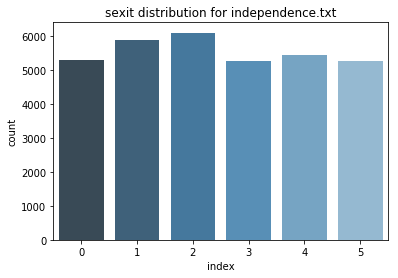

Text(0.5, 1.0, 'transition distribution for sexit mod - independence.txt')

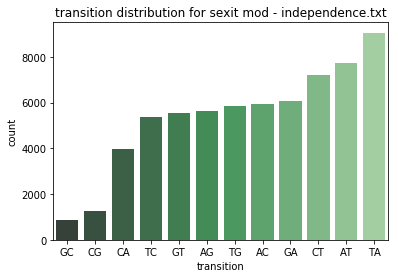

In [16]:
#looking at indep for sexit mod
independence = getBinaryfromFile2('indpendence.txt')
df_sexit_ind =  getbaseNumDistribution(getSexits(independence))

plt.show()
ax = sns.barplot(x ="index", y = "count", data = df_sexit_ind, palette="Blues_d")
ax.set_title("sexit distribution for independence.txt")


seqList_sexit_indep = list(map(sexits2DNA, getSexits(independence)))
df_trans_sexit_indep = getNucTransitionDistributions(seqList_sexit_indep)

plt.show()
ax = sns.barplot(x="transition", y = "count", data = df_trans_sexit_indep, palette="Greens_d")
ax.set_title("transition distribution for sexit mod - independence.txt")


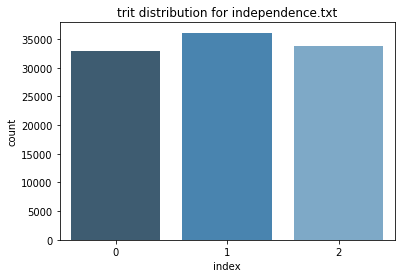

Text(0.5, 1.0, 'transition distribution for sexit mod - independence.txt')

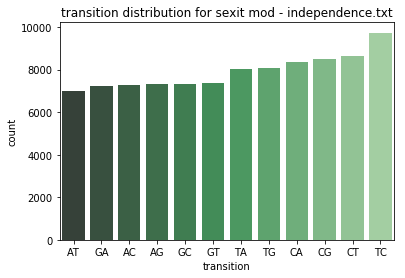

In [17]:
#looking at trit mod for indep
#looking at indep for sexit mod
independence = getBinaryfromFile('indpendence.txt')
df_trit_ind =  getbaseNumDistribution(getTrits(independence))

plt.show()
ax = sns.barplot(x ="index", y = "count", data = df_trit_ind, palette="Blues_d")
ax.set_title("trit distribution for independence.txt")


seqList_trit_indep = list(map(trits2DNA, getTrits(independence)))
df_trans_trit_indep = getNucTransitionDistributions(seqList_trit_indep)

plt.show()
ax = sns.barplot(x="transition", y = "count", data = df_trans_trit_indep, palette="Greens_d")
ax.set_title("transition distribution for sexit mod - independence.txt")


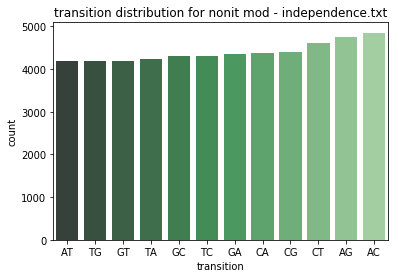

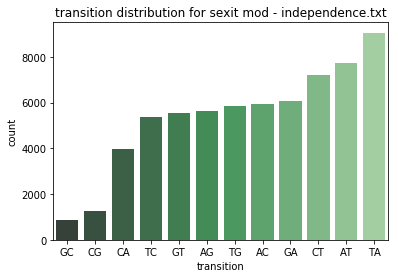

Text(0.5, 1.0, 'transition distribution for trit mod - independence.txt')

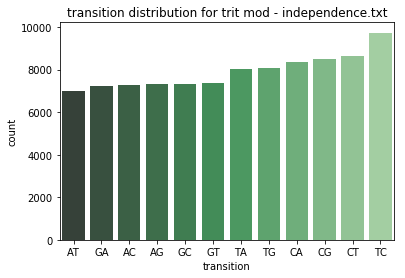

In [18]:
#Looking at independence.txt and random 1m figures side by side: 

#independence.txt - sexit/nonit performed better
#nonit
plt.show()
ax = sns.barplot(x="transition", y = "count", data = df_trans_nonit_indep, palette="Greens_d")
ax.set_title("transition distribution for nonit mod - independence.txt")

#sexit
plt.show()
ax = sns.barplot(x="transition", y = "count", data = df_trans_sexit_indep, palette="Greens_d")
ax.set_title("transition distribution for sexit mod - independence.txt")

#trit
plt.show()
ax = sns.barplot(x="transition", y = "count", data = df_trans_trit_indep, palette="Greens_d")
ax.set_title("transition distribution for trit mod - independence.txt")



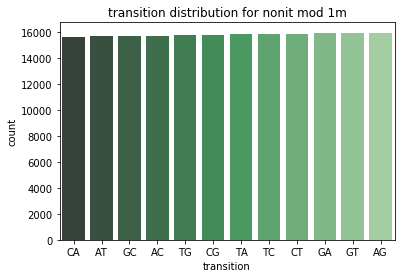

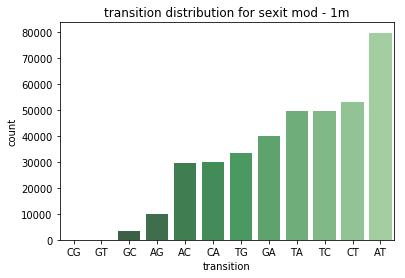

Text(0.5, 1.0, 'transition distribution for trit mod - 1m')

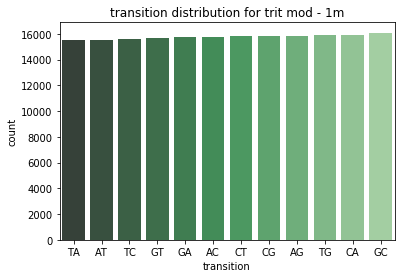

In [19]:
#random 1m - trit performed better
#nonit
plt.show()
ax = sns.barplot(x="transition", y = "count", data = df_trans_nonit, palette="Greens_d")
ax.set_title("transition distribution for nonit mod 1m")
#sexit
plt.show()
ax = sns.barplot(x="transition", y = "count", data = df_trans_sexits, palette="Greens_d")
ax.set_title("transition distribution for sexit mod - 1m")
#trit
plt.show()
ax = sns.barplot(x="transition", y = "count", data = df_trans_trits, palette="Greens_d")
ax.set_title("transition distribution for trit mod - 1m")

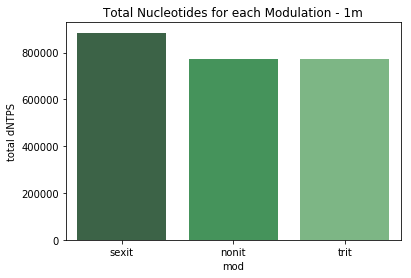

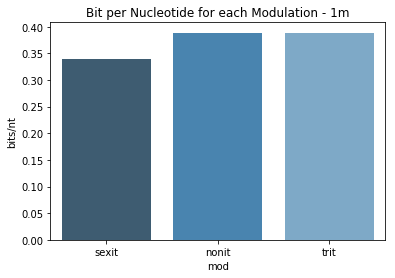

Text(0.5, 1.0, 'GC Content for each Modulation - 1m')

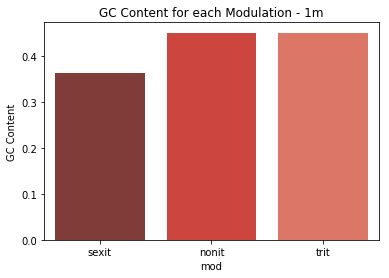

In [20]:
#let's look at how random bil compare to each other
data = []
data.append(getInfoIndex('sexit', 'random 1b', getExtensionLengths, rbmil, list(map(sexits2DNA, getSexits(rbmil)))))
data.append(getInfoIndex('nonit', 'random 1b', getExtensionLengths, rbmil, list(map(nonits2DNA, getNonits(rbmil)))))
data.append(getInfoIndex('trit', 'random 1b', getExtensionLengths, rbmil, list(map(trits2DNA, getTrits(rbmil)))))

df = pd.DataFrame(data, columns = ['mod', 'data', 'bits/nt', 'total bits', 'total dNTPS', 'GC Content'])

plt.show()
ax = sns.barplot(x="mod",  y = "total dNTPS", data = df, palette="Greens_d")
ax.set_title('Total Nucleotides for each Modulation - 1m')
plt.show()
ax = sns.barplot(x="mod", y = "bits/nt", data = df, palette="Blues_d")
ax.set_title('Bit per Nucleotide for each Modulation - 1m')
plt.show()
ax = sns.barplot(x="mod", y = "GC Content", data = df, palette="Reds_d")
ax.set_title('GC Content for each Modulation - 1m')


In [21]:
#given that 0 and 1 for nonits are the most abundant
#this modulation eliminates the posssibility for a CA transition to occur from a 0 or 1 encoding
def getNextNuc_modified(nonit, seq):
    seqDict = {
    "G": {0: "AT", 1: "TA", 2: "AG", 3: "CT", 4: "CA", 5: "CG", 6: "AC", 7:"TC", 8:"TG"},
    "A": {0: "TA", 1: "TG", 2: "CG", 3: "TC", 4: "CA", 5: "CT", 6: "GA", 7:"GC", 8:"GT"},
    "C": {0: "AT", 1: "TA", 2: "AG", 3: "AC", 4: "TC", 5: "TG", 6: "GA", 7:"GC", 8:"GT"},
    "T": {0: "AT", 1: "GT", 2: "CG", 3: "GA", 4: "GC", 5: "CT", 6: "CA", 7:"AC", 8:"AG"}
    }
    return seqDict[seq[-1]][nonit]

def nonits2DNA2(nonits):
    seq = []
    for nonit in nonits:
        #start with G
        seq.append(getNextNuc_modified(int(nonit), "G")) if (not seq) else seq.append(getNextNuc_modified(int(nonit), seq[-1]))
    return "".join(seq)


In [22]:
data.append(getInfoIndex('new_nonit', 'random 1b', getExtensionLengths, rbmil, list(map(nonits2DNA2, getNonits(rbmil)))))
df = pd.DataFrame(data, columns = ['mod', 'data', 'bits/nt', 'total bits', 'total dNTPS', 'GC Content'])



Text(0.5, 1.0, 'Total Nucleotides for each Modulation - 1m')

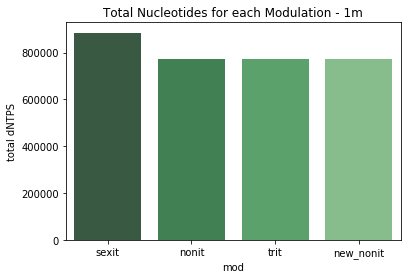

In [23]:
ax = sns.barplot(x="mod",  y = "total dNTPS", data = df, palette="Greens_d")
ax.set_title('Total Nucleotides for each Modulation - 1m')


In [24]:
#new nonit modulation still doing worse than original trit modulation 